# Лабораторная работа №3

## Ширяева Ольга, 4 курс, 3 группа

Построение выпуклой оболочки бинарного изображения

Разработать программу построения выпуклой оболочки на основе преобразований утолщения для бинарных изображений.

Алгоритмы - в 5-й главе первой части спецкурса (с. 22-24)

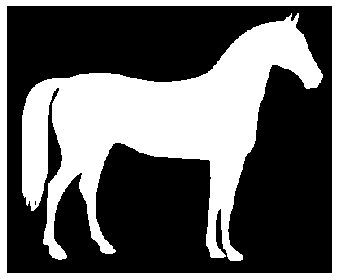

In [11]:
import numpy as np
from skimage import data
from skimage import io
# I do not know why but it didn't work correct with convex hull
# You may replace the scipy import below and see the difference
#from skimage.morphology import binary_erosion
from scipy.ndimage.morphology import binary_erosion
from matplotlib import pyplot as plt
%matplotlib inline

data = data.horse()
data = np.invert(data)
plt.axis('off')
io.imshow(data)
io.show()

In [12]:
def cross(x, a, b):
    x1 = binary_erosion(x, a)
    x2 = binary_erosion(np.logical_not(x), b)
    return np.logical_and(x1, x2)


def thicker(x, a, b):
    return np.logical_or(x, cross(x, a, b))


def plot_results(y):
    plt.imshow(y, cmap=plt.cm.gray)
    plt.axis('off')
    plt.title('Convex hull')
    plt.show()

In [13]:
def iterate_t1_t4(image):
    a = np.array([[True, True, True],
                  [False, False, True],
                  [False, False, False]])
    
    b = np.array([[False, False, False],
                  [False, True, False],
                  [False, False, False]])
    
    for i in range(0, 4):
        image = thicker(image, a, b)
        a = np.rot90(a)
        
    return image
        
        
def iterate_t5_t8(image):
    a = np.array([[True, True, True],
                  [True, False, False],
                  [False, False, False]])
    
    b = np.array([[False, False, False],
                  [False, True, False],
                  [False, False, False]])
    
    for i in range(0, 4):
        image = thicker(image, a, b)
        a = np.rot90(a)
                
    return image


def build_convex_hull(x):
    image = x.copy()
    n = 0

    while True:
        current = image.copy()
        image = iterate_t1_t4(image)
        image = iterate_t5_t8(image)   
        
        n += 1
        if (current == image).all():
            break
    
    return image, n

Iterations:  436


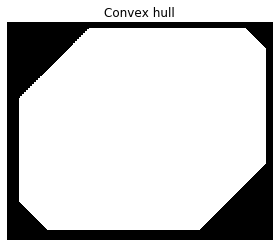

In [14]:
convex_hull, iterations_num = build_convex_hull(data)       
print("Iterations: ", iterations_num)
plot_results(convex_hull)